In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [193]:
features = np.loadtxt('features.txt', delimiter = ',')
target = np.loadtxt('target.txt')

In [194]:
#initialization
b = 0
eta = 0.0000003
eps = 0.25
c = 100
w = np.zeros((1,len(features[0])))

In [195]:
w.shape

(1, 122)

In [196]:
#cost function
def costfunc(w,b,x,y):
    val = 0
    for i in range(len(x)):
        val += max(0,1-y[i]*(np.dot(w,x[i])+ b))        
    return 0.5*(np.sum(np.square(w))) + val*c


In [197]:
#differentiation function wrt w
def diffpar(w,b,x,y) :
    val = 0
    for i in range(len(x)):
        if y[i]*(np.dot(w,x[i])+ b) >= 1:
            val += 0
        else :
            val += -y[i]*x[i]
    return w + c*val       
    

In [198]:
#differentiation function wrt b
def diffb(w,b,x,y):
    val = 0
    for i in range(len(x)):
        if y[i]*(np.dot(w,x[i])+ b) >= 1:
            val += 0
        else :
            val += -y[i]
    return c*val

In [229]:
import timeit

In [230]:
#batch gradient descent
def batch():
    k=0
    b = 0
    eta = 0.0000003
    eps = 0.25
    c = 100
    costper = 100
    w = np.zeros((1,len(features[0])))
    cost = []
    cost.append(costfunc(w,b,features,target))
    while(costper > eps):
        w = w - eta*diffpar(w,b,features,target)
        b = b - eta*diffb(w,b,features,target)
        cost.append(costfunc(w,b,features,target))
        k = k+1
        costper = abs(cost[-2] - cost[-1])/cost[-2]*100 
    return (k,cost)

In [231]:
start = timeit.default_timer()
a, costlist = batch()
end = timeit.default_timer()

In [233]:
print("Total time taken for convergence by batch gradient descent",(end-start))

total time taken for convergence for batch 6.338583500008099


In [232]:
print (a)

57


In [234]:
costlist

[array([641400.]),
 array([391940.8195894]),
 array([336267.95386309]),
 array([310466.1149245]),
 array([308231.90433961]),
 array([306318.46690812]),
 array([304634.73619717]),
 array([303098.87927584]),
 array([301685.24520145]),
 array([300350.36109216]),
 array([299087.28508811]),
 array([297907.03043888]),
 array([296772.15824589]),
 array([295679.03841642]),
 array([294629.59329846]),
 array([293612.96853599]),
 array([292622.96026695]),
 array([291653.7104878]),
 array([290707.74214163]),
 array([289775.16716451]),
 array([288853.38243489]),
 array([287943.54677599]),
 array([287042.42072473]),
 array([286150.56815562]),
 array([285266.42470023]),
 array([284388.78434759]),
 array([283519.79151537]),
 array([282657.72189224]),
 array([281801.02314925]),
 array([280948.84164779]),
 array([280099.7620794]),
 array([279253.0211808]),
 array([278408.6519706]),
 array([277569.97263998]),
 array([276733.77476133]),
 array([275899.62634381]),
 array([275068.31461294]),
 array([274239.

In [203]:
xlist = []
for i in range(1,59):
    xlist.append(i)

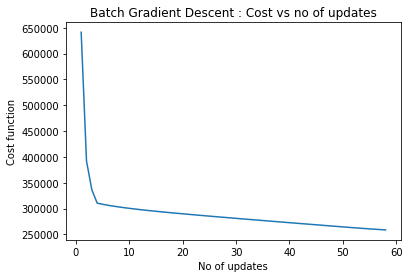

In [227]:
# print (xlist)
plt.plot(xlist, costlist) 
# naming the x axis 
plt.xlabel('No of updates') 
# naming the y axis 
plt.ylabel('Cost function') 
# plt.xticks(np.arange(1,41,2))
# plt.yticks(np.arange(45749,190179))
# giving a title to my graph 
plt.title('Batch Gradient Descent : Cost vs no of updates') 
  
# function to show the plot 
plt.show() 

In [208]:
from sklearn.utils import shuffle

In [209]:
#mini batch gradient descent
def minib():
    q,r = shuffle(features,target)
    k = 0
    l = 0
    c = 100
    n = len(features)
    w = np.zeros((1,len(features[0])))
    b = 0
    eta = 0.00001
    eps = 0.01
    batch_size = 20
    cost = []
    cost.append(costfunc(w,b,features,target))
    newcost = 1
    while(newcost > eps):
        oldcost = newcost
        x = q[l*batch_size: min(n, (l+1)*batch_size)]
        y = r[l*batch_size: min(n, (l+1)*batch_size)]
        w = w - eta*diffpar(w,b,x,y)
        b = b - eta*diffb(w,b,x,y)
        cost.append(costfunc(w,b,features,target))
        k = k+1
        l = int((l+1)%((n+batch_size - 1)/batch_size))
        costper = abs(cost[-2] - cost[-1])/cost[-2]*100
        newcost = (0.5*oldcost + 0.5*costper)
    return (k, cost)

In [235]:
start = timeit.default_timer()
z,costlist2 = minib()
end = timeit.default_timer()


In [236]:
print("Total time taken for convergence by mini batch",(end-start))

Total time taken for convergence by mini batch 52.393720699998084


In [237]:
z

1106

In [238]:
xlist2 = []
for i in range(1,z+2):
    xlist2.append(i)

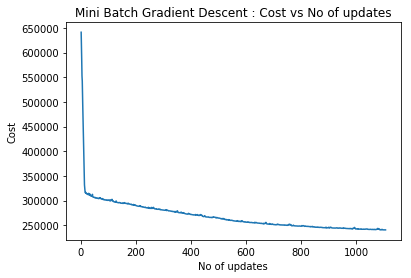

In [240]:
# print (xlist)
plt.plot(xlist2, costlist2) 
# naming the x axis 
plt.xlabel('No of updates') 
# naming the y axis 
plt.ylabel('Cost') 
# plt.xticks(np.arange(1,41,2))
# plt.yticks(np.arange(45749,190179))
# giving a title to my graph 
plt.title('Mini Batch Gradient Descent : Cost vs No of updates') 
  
# function to show the plot 
plt.show() 

In [248]:
#stochastic gradient descent
def stoc():
    q,r = shuffle(features,target)
    k = 0
    l = 0
    n = len(features)
    w = np.zeros((1,len(features[0])))
    b = 0
    c = 100
    eta = 0.0001
    eps = 0.001
    batch_size = 20
    cost = []
    cost.append(costfunc(w,b,features,target))
    newcost = 1
    while(newcost > eps):
        oldcost = newcost
        x = q[l: min(n, (l+1))]
        y = r[l: min(n, (l+1))]
        w = w - eta*diffpar(w,b,x,y)
        b = b - eta*diffb(w,b,x,y)
        cost.append(costfunc(w,b,features,target))
        k = k+1
        l = int(l%n + 1)
        costper = abs(cost[-2] - cost[-1])/cost[-2]*100
        newcost = (0.5*oldcost + 0.5*costper)
    return (k, cost)

In [249]:
start = timeit.default_timer()
lh, costlist3 = stoc()
end = timeit.default_timer()

In [250]:
print("Total time taken for convergence by stochastic gradient descent",(end-start))

Total time taken for convergence by stochastic gradient descent 142.448995200044


In [251]:
lh

2751

In [244]:
xlist3 = []
for i in range(1,lh+2):
    xlist3.append(i)

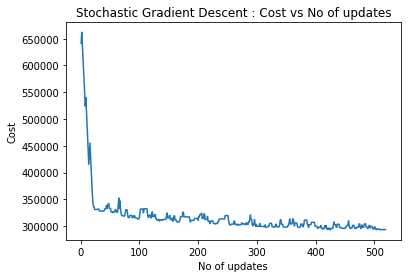

In [247]:
# print (xlist)
plt.plot(xlist3, costlist3) 
# naming the x axis 
plt.xlabel('No of updates') 
# naming the y axis 
plt.ylabel('Cost') 
# plt.xticks(np.arange(1,41,2))
# plt.yticks(np.arange(45749,190179))
# giving a title to my graph 
plt.title('Stochastic Gradient Descent : Cost vs No of updates') 
  
# function to show the plot 
plt.show() 

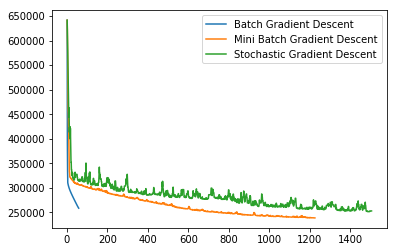

In [224]:
plt.plot(xlist, costlist, label = 'Batch Gradient Descent') 
plt.plot(xlist2, costlist2, label = 'Mini Batch Gradient Descent') 
plt.plot(xlist3, costlist3, label = 'Stochastic Gradient Descent') 
plt.legend(loc="upper right")
plt.show()